<a href="https://www.kaggle.com/code/maimunulkjisan/lung-cancer-detection-using-inception-v4?scriptVersionId=148655390" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Libraries and Models

In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Importing TF Data Generator

In [2]:
train_data= ImageDataGenerator(
    rescale= 1./255,
    horizontal_flip= True,
    shear_range = 0.2,
    zoom_range = 0.2,
    rotation_range= 10
)
train_set=train_data.flow_from_directory(
    "/kaggle/input/lung-cancer-preprocessed-dataset/lung/Train",
    target_size= (224, 224),
    batch_size= 32,
    class_mode= 'sparse'
)


Found 11250 images belonging to 3 classes.


In [3]:
val_data= ImageDataGenerator(
    rescale= 1./255,
    horizontal_flip= True,
    shear_range = 0.2,
    zoom_range = 0.2,
    rotation_range= 10
)
val_set=train_data.flow_from_directory(
    "/kaggle/input/lung-cancer-preprocessed-dataset/lung/Val",
    target_size= (224, 224),
    batch_size= 32,
    class_mode= 'sparse'
)


Found 1875 images belonging to 3 classes.


In [4]:
test_data= ImageDataGenerator(
    rescale= 1./255,
    horizontal_flip= True,
    shear_range = 0.2,
    zoom_range = 0.2,
    rotation_range= 10
)
test_set=train_data.flow_from_directory(
    "/kaggle/input/lung-cancer-preprocessed-dataset/lung/Test",
    target_size= (224,224),
    batch_size= 32,
    class_mode= 'sparse'
)


Found 1875 images belonging to 3 classes.


# Checking Image Shape

In [5]:
for image_batch, label_batch in train_set:
    print(image_batch.shape)
    break

(32, 224, 224, 3)


In [6]:
class_names = ['adenocarcinoma', 'benign', 'squamous_carcinoma']
print(class_names)


['adenocarcinoma', 'benign', 'squamous_carcinoma']


# Importing the VGG 16 pretrained model and weights from "imagenet"

In [7]:
IMAGE_SIZE = [224, 224]

In [8]:
# Load the InceptionV3 model
inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

87910968/87910968 [==============================] - 0s 0us/step


In [9]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [10]:
# Add your own layers
x = GlobalAveragePooling2D()(inception.output)
x = Dense(1024, activation='relu')(x)  # You can add more dense layers if needed
prediction = Dense(3, activation='softmax')(x)  # Assuming you have 3 classes
# Create a model object
model = Model(inputs=inception.input, outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='SparseCategoricalCrossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# Let's Trained The Pretrained Model

In [12]:
history= model.fit(
  train_set,
  validation_data=val_set,
  epochs=5,
  steps_per_epoch=len(train_set),
  validation_steps=len(val_set)
)

Epoch 1/5
352/352 [==============================] - 240s 644ms/step - loss: 0.2753 - accuracy: 0.8974 - val_loss: 0.1710 - val_accuracy: 0.9280
Epoch 2/5
352/352 [==============================] - 181s 514ms/step - loss: 0.1549 - accuracy: 0.9368 - val_loss: 0.1448 - val_accuracy: 0.9461
Epoch 3/5
352/352 [==============================] - 181s 514ms/step - loss: 0.1307 - accuracy: 0.9476 - val_loss: 0.1258 - val_accuracy: 0.9477
Epoch 4/5
352/352 [==============================] - 181s 516ms/step - loss: 0.1252 - accuracy: 0.9503 - val_loss: 0.1138 - val_accuracy: 0.9595
Epoch 5/5
352/352 [==============================] - 183s 519ms/step - loss: 0.1108 - accuracy: 0.9572 - val_loss: 0.1856 - val_accuracy: 0.9269


# Ploting Loss and Accuracy

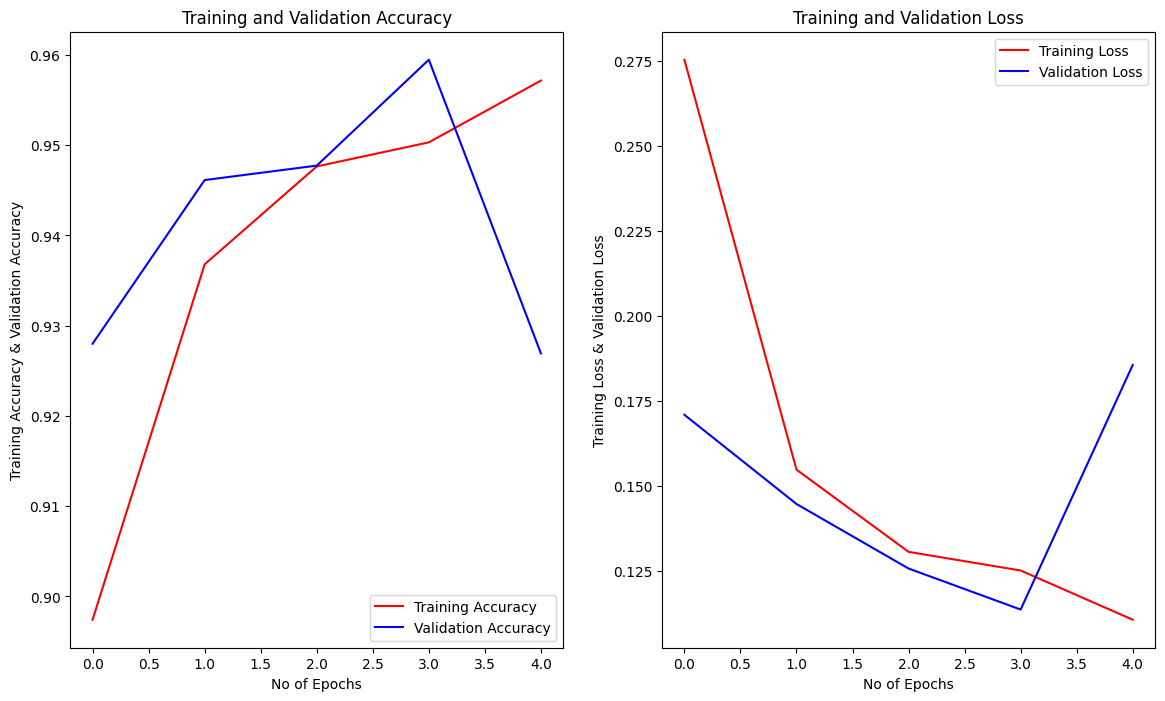

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.plot(range(5), acc, label='Training Accuracy',color='red')
plt.plot(range(5), val_acc, label='Validation Accuracy',color='blue')
plt.xlabel('No of Epochs')
plt.ylabel('Training Accuracy & Validation Accuracy')
plt.title('Visualization of Training Accuracy & Validation Accuracy Result')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(5), loss, label='Training Loss',color='red')
plt.plot(range(5), val_loss, label='Validation Loss',color='blue')
plt.xlabel('No of Epochs')
plt.ylabel('Training Loss & Validation Loss')
plt.title('Visualization of Training Loss & Validation Loss Result')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Evaluation

In [14]:
loss,accuracy=model.evaluate(train_set)

352/352 [==============================] - 154s 436ms/step - loss: 0.1692 - accuracy: 0.9332


In [15]:
accuracy*100

93.31555366516113

In [16]:
val_loss,val_accuracy=model.evaluate(val_set)
val_accuracy*100

59/59 [==============================] - 26s 436ms/step - loss: 0.1844 - accuracy: 0.9232


92.3200011253357

In [17]:
test_loss,test_accuracy=model.evaluate(test_set)
test_accuracy*100

59/59 [==============================] - 32s 535ms/step - loss: 0.1924 - accuracy: 0.9243


92.42666959762573

In [18]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

first image to predict
actual label: benign
1/1 [==============================] - 1s 1s/step
predicted label: benign


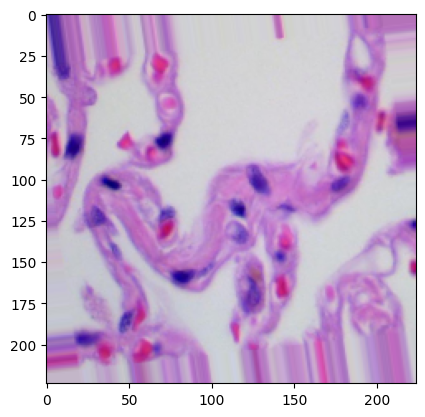

In [19]:
import numpy as np
for images_batch, labels_batch in test_set:
    
    first_image = images_batch[0]
    first_label = int(labels_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    break

1/1 [==============================] - 0s 28ms/step


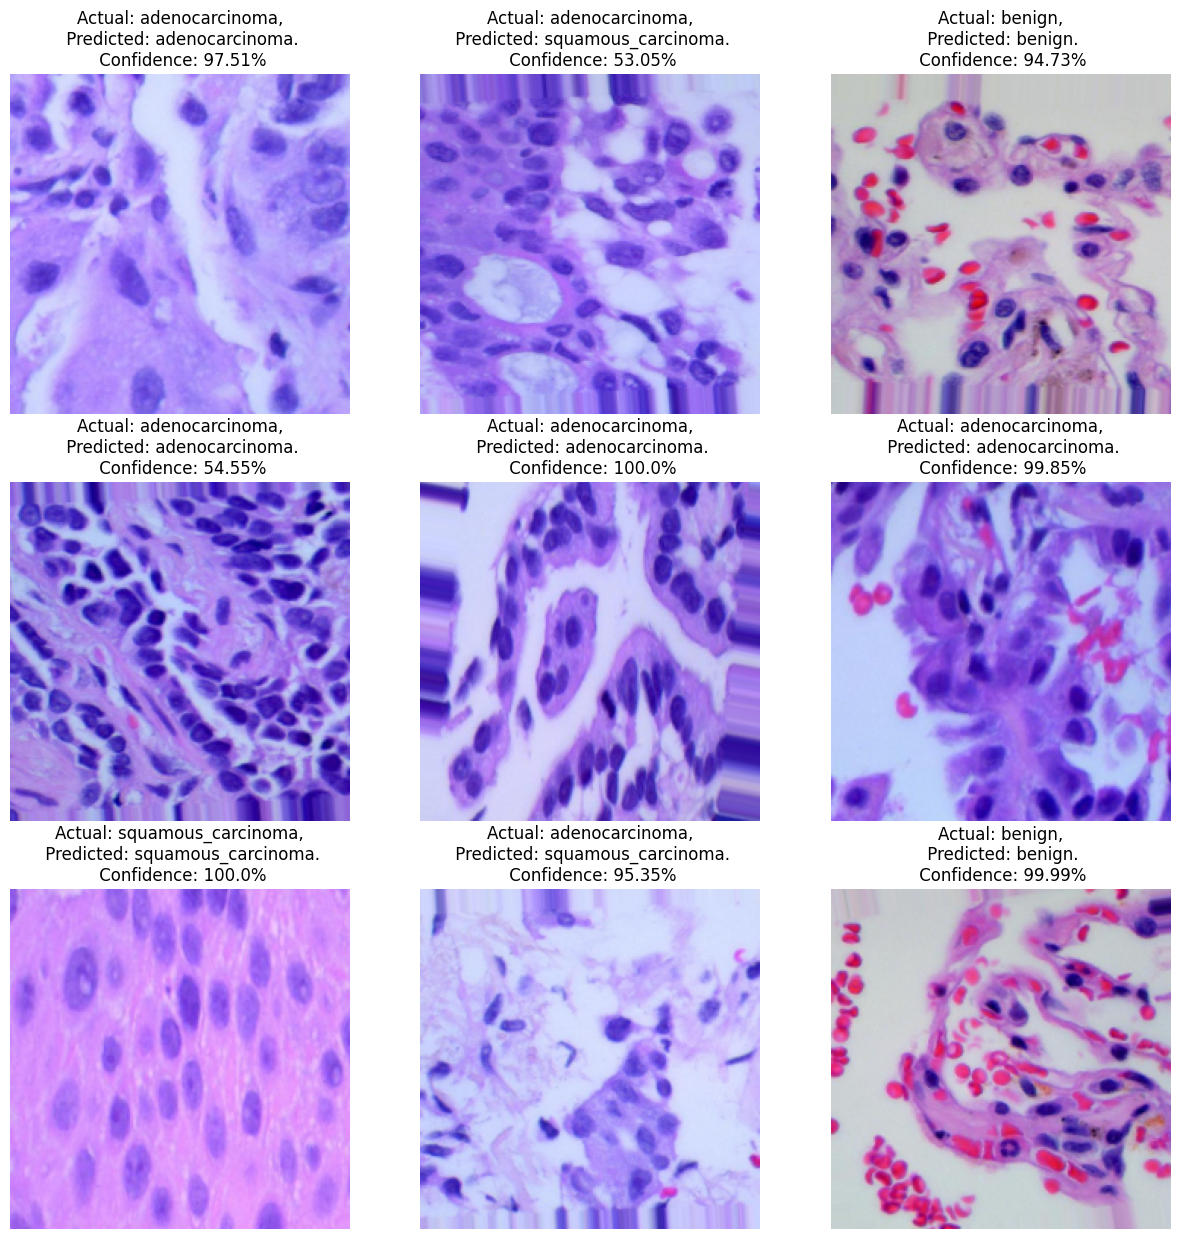

In [20]:
plt.figure(figsize=(15, 15))
for images, labels in test_set:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

Generating predictions...
4/4 [==============================] - 0s 93ms/step
Classification Report:
                    precision    recall  f1-score   support

    adenocarcinoma       0.90      0.84      0.87        32
            benign       1.00      0.93      0.97        46
squamous_carcinoma       0.91      1.00      0.95        50

          accuracy                           0.94       128
         macro avg       0.94      0.93      0.93       128
      weighted avg       0.94      0.94      0.94       128

Generating confusion matrix...


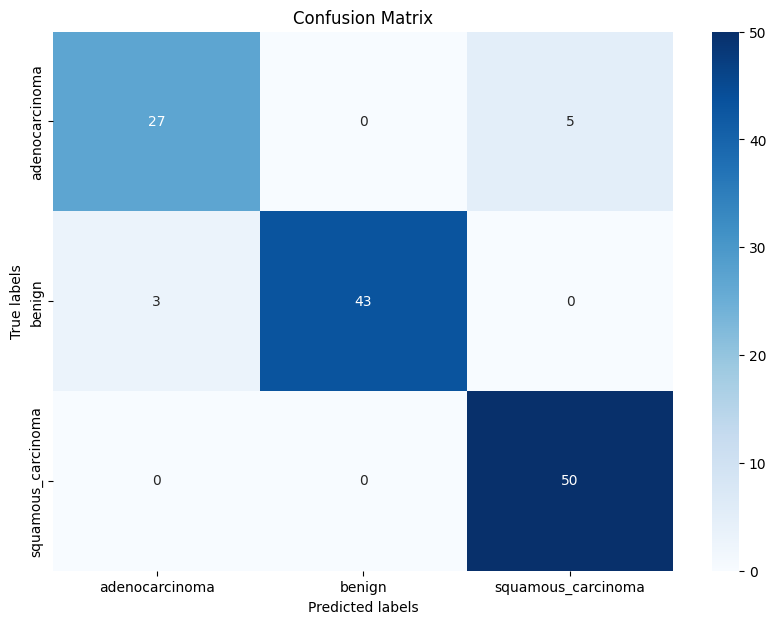

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Make predictions on a subset of the test set
subset_size = 100  # Adjust the subset size as needed
test_images_subset, test_labels_subset = [], []
for images, labels in test_set:
    if len(test_images_subset) < subset_size:
        test_images_subset.extend(images)
        test_labels_subset.extend(labels)
    else:
        break
test_images_subset = np.array(test_images_subset)
test_labels_subset = np.array(test_labels_subset)

# Generate predictions
print("Generating predictions...")
y_pred_subset = model.predict(test_images_subset)
y_pred_classes_subset = np.argmax(y_pred_subset, axis=1)

# Generate classification report
class_names = ['adenocarcinoma', 'benign', 'squamous_carcinoma']  # Replace with your class names
print("Classification Report:")
print(classification_report(test_labels_subset, y_pred_classes_subset, target_names=class_names))

# Generate confusion matrix
print("Generating confusion matrix...")
cm_subset = confusion_matrix(test_labels_subset, y_pred_classes_subset)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_subset, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
